##**Business Problem**

Less-Than-Truckload (LTL) is a very complicated business. As part of
operations, trips are created to deliver or pickup shipments from the
customer locations. Effective trip planning is key for optimal operation of
LTL business. For better trip planning, we need to estimate how long our
drivers will spend at each customer location (called as Dwell Time).

##**Type of Problem:**

Regression

##**Metric**

Root Mean Squre Error (RMSE)

##**Summary of Machine Learning techniques used by me in each stage:**

1. **Exploratory Data Analysis**

    a. Inter Quartile Range

    b. Percentiles

    c. Presence of NULL values

    d. Probalility Distribution Function

    e. Cumulative Distribution Function

    f. Outlier Analysis

2. **Data Preprocessing**

    a. Imputation &/or Replacement of values

    b. Categorical Encoding

    c. Normalization of numeric features.

3. **Feature Engineering & Feature Selection**

4. **Model Building & Hyperparameter Tuning**

    a. Linear Regression

    b. Random Forest

    c. Gradient Boosting - LightGBM

5. **Model Evaluation, Results & Performance Analysis**

6. **How Can This Solution Be Improved**

7. **Deployment**

8. **Conclusion**

Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

Connecting to Google Drive for fetching data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/XPO' 

/content/drive/MyDrive/XPO


In [ ]:
!pwd

/content/drive/MyDrive/XPO


In [ ]:
!ls

'DataSet[24].csv'  'XPOLogistics_ML_Challenge (1).pdf'


##Load the Data

In [2]:
print("Reading data...")
data = pd.read_csv('DataSet[24].csv')
print("Done.")

Reading data...
Done.


##**1. Exploratory Data Analysis**

***Section Summary: Exploratory Data Analysis***

1. The given data consists of a total of 13726 rows / data points and 18 columns / features.

2. Out of the given 18 features, 13 features are of type numeric, 2 features are boolean and 3 features are categorical. Thus, we will need to apply techniques such as normalozation and categorical encoding before applying models.

3. Range of values contained by the numerical columns are different. Some have a greater range as compared to others. Thus, we will need to normalize columns in order to make sure that all the columns hold and equal contribution during modelling.

4. No NULL values are present in the given data.
Some columns contains a value 'U' which might be standing for Unavailable. Thus, we can either drop these rows (which isn't always the best thing to do) or we can impute / replace them with techniques such as mean imputation, median imputation or imputation based on most frequent values in that particular column. I have implemented the later approach in this case.

5. Percentiles, CDF and PDF help us understand how the data is distributed and can be of great help in understanding underlying patterns in the data. In-depth analysis using these techniques can be found below in the section.

6. The target variable Dwell Time has values ranging between 10 and 217 units. The distribution can be observed in the section below. If we carefully observe the CDF and its percentiles, we can that there Most of stations or locations require less than 50 units of the time and very less amount of stations require significantly higher time than that. 

In [3]:
data.shape

(13726, 18)

In [4]:
data.head(5)

,DL,DP,HE,HK,HL,PU,SE,SL,WEIGHT,MOTORIZED_PIECES_COUNT,TOTAL_VOLUME_CUBIC_FOOT,HAZMAT_FLAG,FREEZABLE_FLAG,DWELL_TIME,NODE_VISIT_CNT,dock_availability_indicator,forklift_availability_indicator,customer_location_type
0,1,0,0,0,0,0,0,0,17177,12,587.88,False,False,63.483333,37,Y,Y,Business/Commercial
1,2,0,0,0,0,0,0,0,4553,22,1353.33,False,False,61.883333,62,Y,N,Business/Commercial
2,16,0,0,0,0,0,0,0,10355,39,1151.83,False,False,78.833333,373,Y,Y,Business/Commercial
3,1,0,0,0,0,0,0,0,1911,1,330.67,False,False,26.583333,46,Y,Y,Distribution Center
4,0,0,0,0,0,3,0,0,14787,21,832.32,False,False,38.716667,128,Y,Y,Business/Commercial


In [5]:
data.columns

Index(['DL', 'DP', 'HE', 'HK', 'HL', 'PU', 'SE', 'SL', 'WEIGHT',
       'MOTORIZED_PIECES_COUNT', 'TOTAL_VOLUME_CUBIC_FOOT', 'HAZMAT_FLAG',
       'FREEZABLE_FLAG', 'DWELL_TIME', 'NODE_VISIT_CNT',
       'dock_availability_indicator', 'forklift_availability_indicator',
       'customer_location_type'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13726 entries, 0 to 13725
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DL                               13726 non-null  int64  
 1   DP                               13726 non-null  int64  
 2   HE                               13726 non-null  int64  
 3   HK                               13726 non-null  int64  
 4   HL                               13726 non-null  int64  
 5   PU                               13726 non-null  int64  
 6   SE                               13726 non-null  int64  
 7   SL                               13726 non-null  int64  
 8   WEIGHT                           13726 non-null  int64  
 9   MOTORIZED_PIECES_COUNT           13726 non-null  int64  
 10  TOTAL_VOLUME_CUBIC_FOOT          13726 non-null  float64
 11  HAZMAT_FLAG                      13726 non-null  bool   
 12  FREEZABLE_FLAG    

In [7]:
data.describe()

,DL,DP,HE,HK,HL,PU,SE,SL,WEIGHT,MOTORIZED_PIECES_COUNT,TOTAL_VOLUME_CUBIC_FOOT,DWELL_TIME,NODE_VISIT_CNT
count,13726.000000,13726.0,13726.0,13726.0,13726.000000,13726.000000,13726.0,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000
mean,0.857570,0.0,0.0,0.0,0.001239,0.715649,0.0,0.000874,2767.807810,3.095366,420.502586,35.566812,69.877167
std,1.042714,0.0,0.0,0.0,0.145103,1.648119,0.0,0.102426,3978.179346,5.630053,477.307026,18.944274,115.963824
min,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,6.000000,0.000000,15.200000,10.000000,6.000000
25%,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,836.000000,1.000000,237.662500,24.350000,20.000000
50%,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1345.000000,1.000000,376.500000,31.291666,40.000000
75%,1.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,2861.000000,3.000000,509.430000,40.616667,89.000000
max,21.000000,0.0,0.0,0.0,17.000000,38.000000,0.0,12.000000,56730.000000,241.000000,37381.690000,217.350000,3404.000000


In [ ]:
data['customer_location_type'].value_counts()

Business/Commercial                                           11575
Distribution Center                                            1254
Shopping Mall/Strip Mall                                        175
Grocery Warehouse                                               144
U                                                               140
Construction/Utility Sites: Construction Site                    54
Government Sites: Military                                       48
University/College                                               39
Residential: Business Operating Within a Private Residence       38
Residential: Residence                                           35
Government Sites: Other Government Sites                         34
Government Sites: Post Office                                    33
Residential: School (K-12), Pre-School, Day Care                 32
Construction/Utility Sites: Utility Site                         29
Residential: Farm                               

In [ ]:
data['HAZMAT_FLAG'].value_counts()

False    13127
True       599
Name: HAZMAT_FLAG, dtype: int64

In [ ]:
data['FREEZABLE_FLAG'].value_counts()

False    13647
True        79
Name: FREEZABLE_FLAG, dtype: int64

In [ ]:
data['dock_availability_indicator'].value_counts()

Y    10080
N     3506
U      140
Name: dock_availability_indicator, dtype: int64

In [ ]:
data['forklift_availability_indicator'].value_counts()

Y    12111
N     1613
U        2
Name: forklift_availability_indicator, dtype: int64

In [ ]:
data['customer_location_type'].value_counts()

Business/Commercial                                           11575
Distribution Center                                            1254
Shopping Mall/Strip Mall                                        175
Grocery Warehouse                                               144
U                                                               140
Construction/Utility Sites: Construction Site                    54
Government Sites: Military                                       48
University/College                                               39
Residential: Business Operating Within a Private Residence       38
Residential: Residence                                           35
Government Sites: Other Government Sites                         34
Government Sites: Post Office                                    33
Residential: School (K-12), Pre-School, Day Care                 32
Construction/Utility Sites: Utility Site                         29
Residential: Farm                               

In [ ]:
data.isnull().sum(axis = 0)

DL                                 0
DP                                 0
HE                                 0
HK                                 0
HL                                 0
PU                                 0
SE                                 0
SL                                 0
WEIGHT                             0
MOTORIZED_PIECES_COUNT             0
TOTAL_VOLUME_CUBIC_FOOT            0
HAZMAT_FLAG                        0
FREEZABLE_FLAG                     0
DWELL_TIME                         0
NODE_VISIT_CNT                     0
dock_availability_indicator        0
forklift_availability_indicator    0
customer_location_type             0
dtype: int64

In [9]:
def calc_percentiles(df, attr, start, stop, step_size):
    '''Function to calculate parcentiles in a given range'''
    ##start: start percentile range from
    ##stop: stop percentile range at
    ##step_size: calculate percentiles at each interval of step size
    for i in range(start, stop, step_size):
        print(f'{i} th percentile value of given attribute is {np.percentile(df[attr], i)}')

In [ ]:
calc_percentiles(data, 'WEIGHT', 0, 100, 25)

0 th percentile value of given attribute is 6.0
25 th percentile value of given attribute is 836.0
50 th percentile value of given attribute is 1345.0
75 th percentile value of given attribute is 2861.0


In [10]:
calc_percentiles(data, 'DL', 75, 101, 1)

75 th percentile value of given attribute is 1.0
76 th percentile value of given attribute is 1.0
77 th percentile value of given attribute is 1.0
78 th percentile value of given attribute is 1.0
79 th percentile value of given attribute is 1.0
80 th percentile value of given attribute is 1.0
81 th percentile value of given attribute is 1.0
82 th percentile value of given attribute is 1.0
83 th percentile value of given attribute is 1.0
84 th percentile value of given attribute is 1.0
85 th percentile value of given attribute is 1.0
86 th percentile value of given attribute is 1.0
87 th percentile value of given attribute is 1.0
88 th percentile value of given attribute is 1.0
89 th percentile value of given attribute is 1.0
90 th percentile value of given attribute is 2.0
91 th percentile value of given attribute is 2.0
92 th percentile value of given attribute is 2.0
93 th percentile value of given attribute is 2.0
94 th percentile value of given attribute is 2.0
95 th percentile val

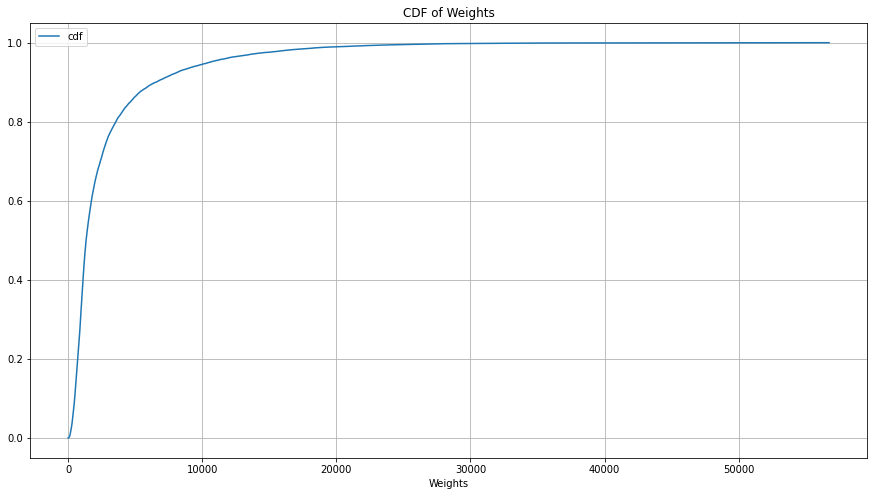

In [ ]:
# Define your series
s = pd.Series(data['WEIGHT'], name='value')
df = pd.DataFrame(s)
# Get to the CDF directly
df['cdf'] = df.rank(method='average', pct = True)
# Sort and plot
df.sort_values('value').plot(x='value', y='cdf', grid=True, figsize=(15, 8),
                             xlabel='Weights', title='CDF of Weights')

In [ ]:
calc_percentiles(data, 'MOTORIZED_PIECES_COUNT', 0, 100, 25)

0 th percentile value of given attribute is 0.0
25 th percentile value of given attribute is 1.0
50 th percentile value of given attribute is 1.0
75 th percentile value of given attribute is 3.0


In [11]:
calc_percentiles(data, 'MOTORIZED_PIECES_COUNT', 75, 101, 1)

75 th percentile value of given attribute is 3.0
76 th percentile value of given attribute is 3.0
77 th percentile value of given attribute is 3.0
78 th percentile value of given attribute is 4.0
79 th percentile value of given attribute is 4.0
80 th percentile value of given attribute is 4.0
81 th percentile value of given attribute is 4.0
82 th percentile value of given attribute is 4.0
83 th percentile value of given attribute is 5.0
84 th percentile value of given attribute is 5.0
85 th percentile value of given attribute is 5.0
86 th percentile value of given attribute is 5.0
87 th percentile value of given attribute is 6.0
88 th percentile value of given attribute is 6.0
89 th percentile value of given attribute is 6.0
90 th percentile value of given attribute is 7.0
91 th percentile value of given attribute is 8.0
92 th percentile value of given attribute is 8.0
93 th percentile value of given attribute is 9.0
94 th percentile value of given attribute is 10.0
95 th percentile va

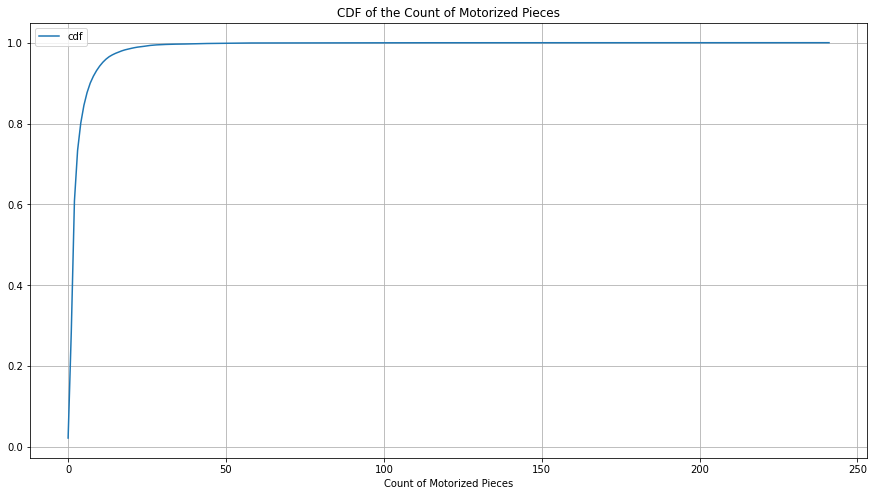

In [ ]:
# Define your series
s = pd.Series(data['MOTORIZED_PIECES_COUNT'], name='value')
df = pd.DataFrame(s)
# Get to the CDF directly
df['cdf'] = df.rank(method='average', pct = True)
# Sort and plot
df.sort_values('value').plot(x='value', y='cdf', grid=True, figsize=(15, 8),
                             xlabel='Count of Motorized Pieces', title='CDF of the Count of Motorized Pieces')

In [ ]:
calc_percentiles(data, 'TOTAL_VOLUME_CUBIC_FOOT', 0, 100, 25)

0 th percentile value of given attribute is 15.2
25 th percentile value of given attribute is 237.6625
50 th percentile value of given attribute is 376.5
75 th percentile value of given attribute is 509.42999999999995


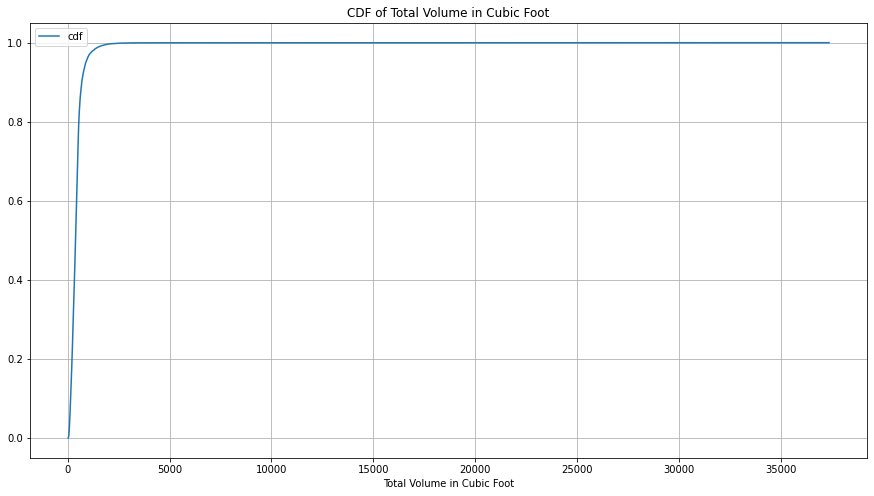

In [ ]:
# Define your series
s = pd.Series(data['TOTAL_VOLUME_CUBIC_FOOT'], name='value')
df = pd.DataFrame(s)
# Get to the CDF directly
df['cdf'] = df.rank(method='average', pct = True)
# Sort and plot
df.sort_values('value').plot(x='value', y='cdf', grid=True, figsize=(15, 8),
                             xlabel='Total Volume in Cubic Foot', title='CDF of Total Volume in Cubic Foot')

In [ ]:
calc_percentiles(data, 'NODE_VISIT_CNT', 0, 100, 25)

0 th percentile value of given attribute is 6.0
25 th percentile value of given attribute is 20.0
50 th percentile value of given attribute is 40.0
75 th percentile value of given attribute is 89.0


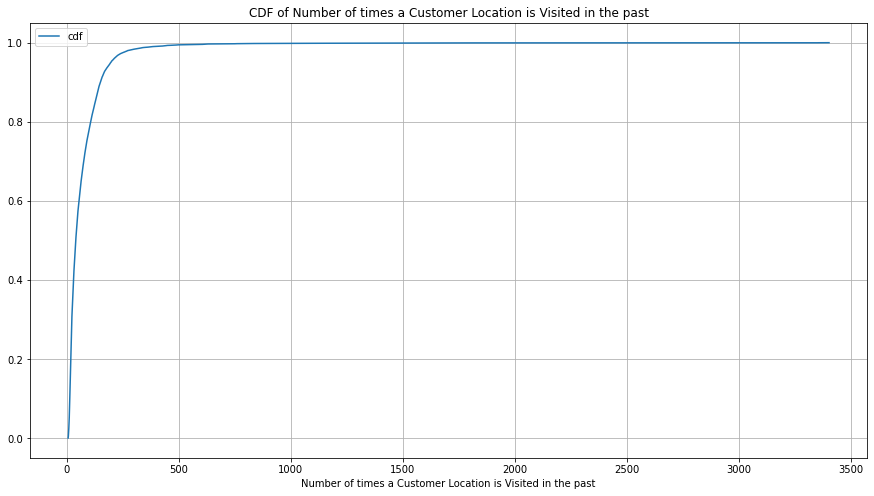

In [ ]:
# Define your series
s = pd.Series(data['NODE_VISIT_CNT'], name='value')
df = pd.DataFrame(s)
# Get to the CDF directly
df['cdf'] = df.rank(method='average', pct = True)
# Sort and plot
df.sort_values('value').plot(x='value', y='cdf', grid=True, figsize=(15, 8),
                             xlabel='Number of times a Customer Location is Visited in the past', title='CDF of Number of times a Customer Location is Visited in the past')

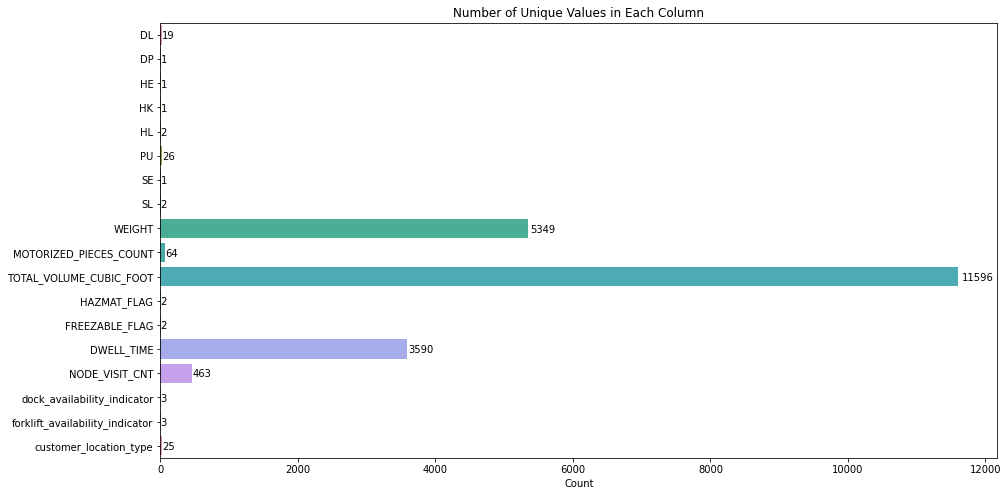

In [ ]:
# Check the number of unique values in each column
distinct_values = data.nunique().reset_index()
distinct_values.columns = ['column','distinct_value_count']
plt.figure(figsize=(15, 8))
plt.title("Number of Unique Values in Each Column")
ax = sns.barplot(y='column', x='distinct_value_count', data=distinct_values, orient='h')
plt.xlabel('Count')
plt.ylabel('')
for p in ax.patches:
    width = p.get_width()
    ax.annotate('{:1.0f}'.format(width), ((p.get_x() + p.get_width())*1.005, p.get_y()+0.55*p.get_height()), ha='left', va='center')

In [ ]:
def count_plot(data, x, hue, mytype):
    '''Function to plot Histogram with respect to given arguments'''
    plt.figure(figsize=(15, 8))
    sns.set(font_scale=1)
    sns.countplot(x=x, hue=hue, data=data, palette=None)
    plt.xlabel(x, fontsize=20)
    plt.ylabel('Count', fontsize=20)
    plt.xticks(rotation='90')
    if x == hue:
        plt.title('Count Plot for {0} in the {1} data'.format(x, mytype), fontsize=25)
    else:
        plt.title('Count Plot for {0} versus {1} in the {2} data'.format(x, hue, mytype), fontsize=25)
    plt.tight_layout()

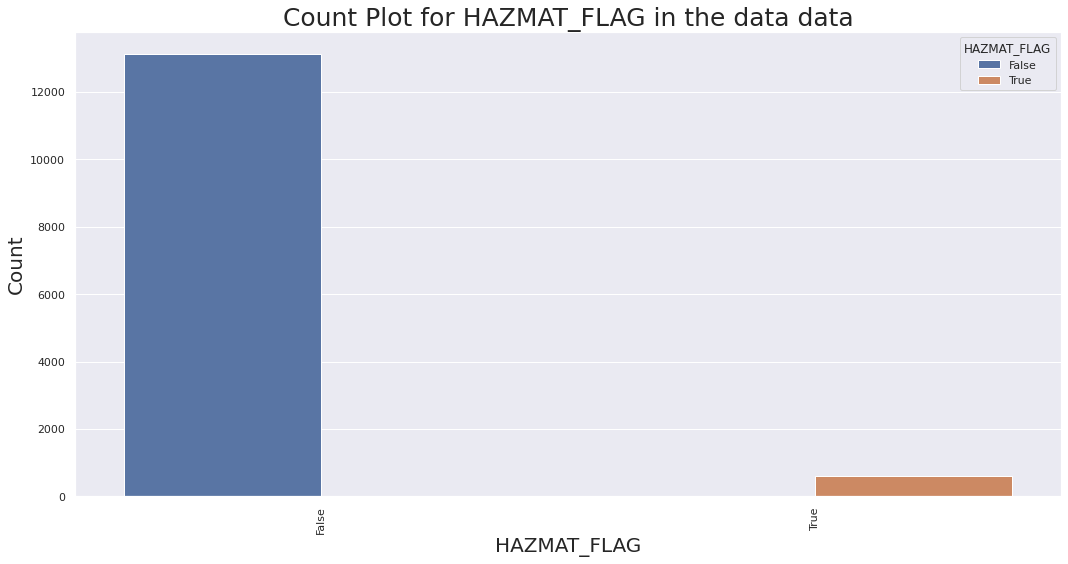

In [ ]:
count_plot(data, 'HAZMAT_FLAG', 'HAZMAT_FLAG', 'data')

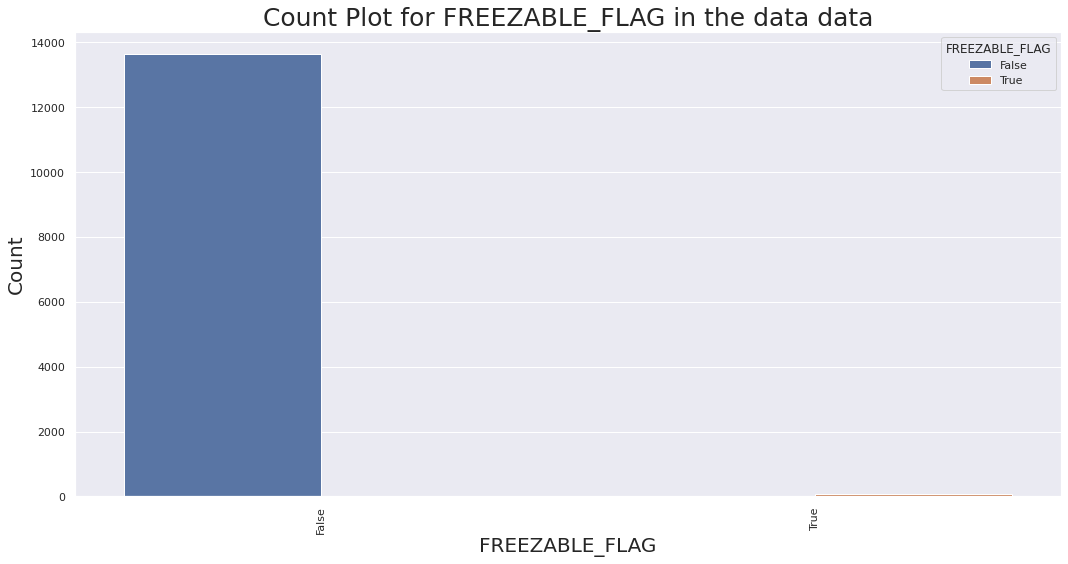

In [ ]:
count_plot(data, 'FREEZABLE_FLAG', 'FREEZABLE_FLAG', 'data')

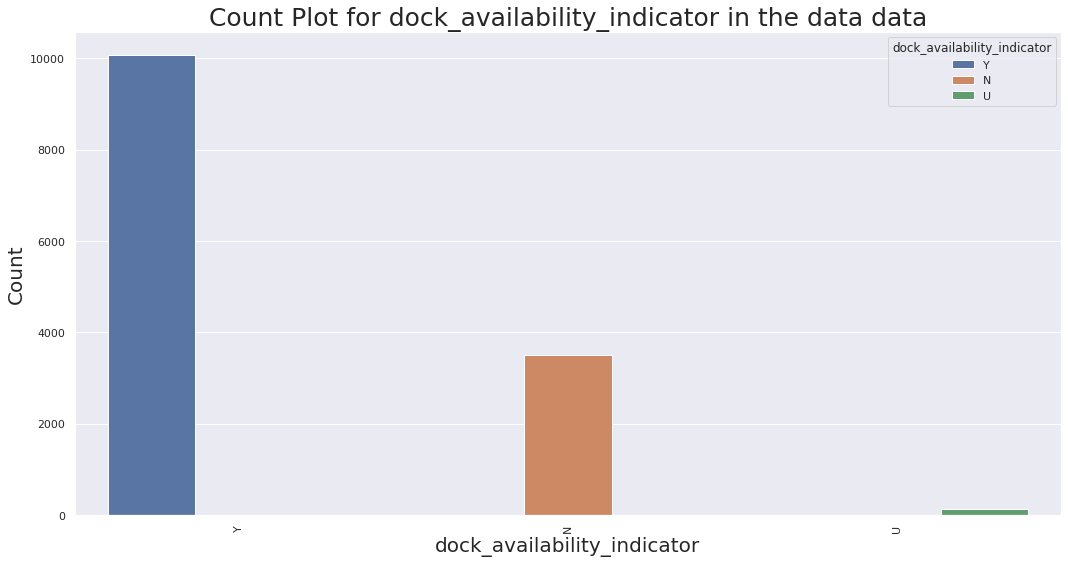

In [ ]:
count_plot(data, 'dock_availability_indicator', 'dock_availability_indicator', 'data')

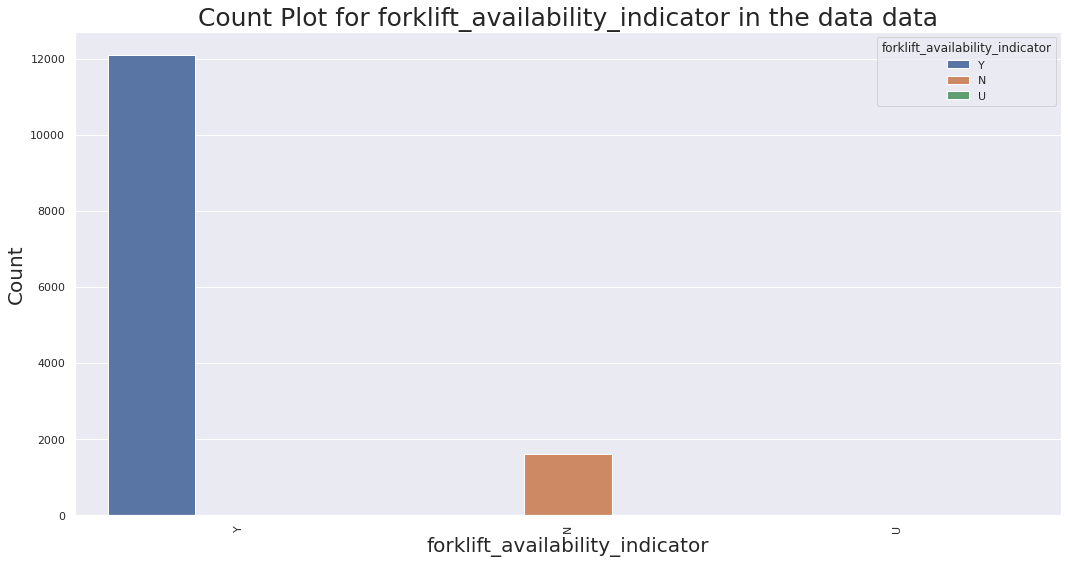

In [ ]:
count_plot(data, 'forklift_availability_indicator', 'forklift_availability_indicator', 'data')

In [12]:
calc_percentiles(data, 'DWELL_TIME', 0, 101, 25)

0 th percentile value of given attribute is 10.0
25 th percentile value of given attribute is 24.35
50 th percentile value of given attribute is 31.291666499999998
75 th percentile value of given attribute is 40.616667
100 th percentile value of given attribute is 217.35


In [13]:
calc_percentiles(data, 'DWELL_TIME', 90, 101, 1)

90 th percentile value of given attribute is 55.183333
91 th percentile value of given attribute is 57.29583325
92 th percentile value of given attribute is 59.733333
93 th percentile value of given attribute is 62.35
94 th percentile value of given attribute is 66.033333
95 th percentile value of given attribute is 69.89583350000001
96 th percentile value of given attribute is 75.166667
97 th percentile value of given attribute is 81.60416649999999
98 th percentile value of given attribute is 91.033333
99 th percentile value of given attribute is 111.729167
100 th percentile value of given attribute is 217.35


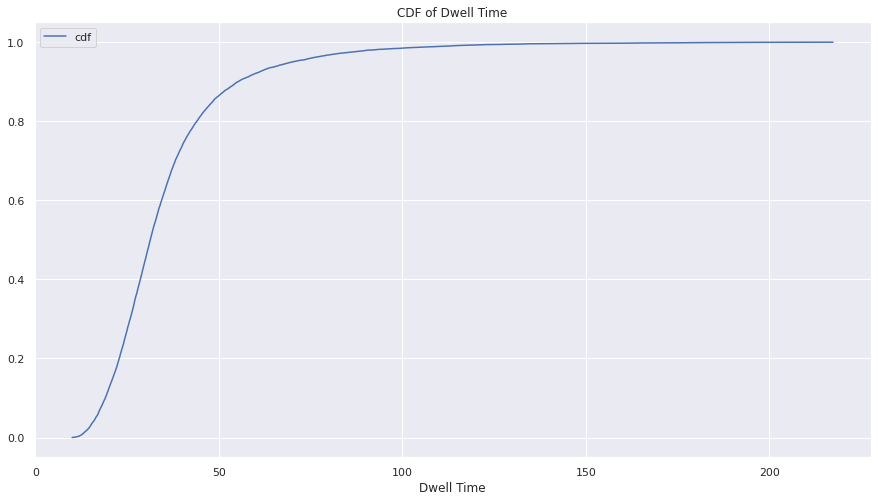

In [ ]:
# Define your series
s = pd.Series(data['DWELL_TIME'], name='value')
df = pd.DataFrame(s)
# Get to the CDF directly
df['cdf'] = df.rank(method='average', pct = True)
# Sort and plot
df.sort_values('value').plot(x='value', y='cdf', grid=True, figsize=(15, 8),
                             xlabel='Dwell Time', title='CDF of Dwell Time')

In [ ]:
y = data['DWELL_TIME']
X = data.drop(columns=['DWELL_TIME'])

In [ ]:
print(X.shape)
print(len(y))

(13726, 17)
13726


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(len(y_train))
print(X_test.shape)
print(len(y_test))

(10980, 17)
10980
(2746, 17)
2746


##**2. Feature Engineering & Feature Selection**

***Section: Feature Engineering & Feature Selection***

1. Apart from the given 17 features, new potential features can be constructed which might help in making better predictions. 
2. These newly constructed features can be either derived from some of the existing features or can be engineered totally from scratch or by studying the data in more depth.
3. It might often happen that not all the features that we have contribute largely towards making predictions. They can add to the risk of curse of dimensionality leading to dip in the model performance.
4. Dimensionality Reduction Techniques such as PCA, t-SNE, Forward Feature Selection, Backward Feature Selection, etc. can be applied to make sure that we eliminate useless features. This can be also done by plotting a graph of feature importance after building each model. 
5. Given the limited time, I wasn't able to put much time into engineering new features, thus, mentioning the idea here as if given more time, I can try spending some time of it. 

##**3. Data Preprocessing**

***Section Summary: Data Preprocessing***

1. As seen in the EDA section, there are some columns that have an unkown value 'U' present in them. These data points doesn't make much sense, thus as discussed, such data points cane be either dropped or replaced / imputed with techniques such as mean imputation, median imputation or imputation based on most frequent values in that particular column. I have implemented the later approach in this case. 

2. Also, different numerical columns have differet range of values. Thus, it might happen that features having greater range of values can dominate over the ones with having smaller range of values. This might hamper our hamper our model and would lead to significant drop in the performance. Thus, in order to avoid this, I have applied min-max normalization over numerical columns.

3. Machine Learning Models are mathemtical models which understand only numeric data. Feeding textual data doesn't make any sense. Thus, I have applied encoding on categorical and boolean columns to convert them into numericals. Thus, this will make sense and we can apply ML techniques on that.  

In [ ]:
X_train['dock_availability_indicator'].value_counts()

Y    8068
N    2798
U     114
Name: dock_availability_indicator, dtype: int64

In [ ]:
X_train.loc[(X_train.dock_availability_indicator == 'U'), 'dock_availability_indicator'] = 'Y'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
X_train['dock_availability_indicator'].value_counts()

Y    8182
N    2798
Name: dock_availability_indicator, dtype: int64

In [ ]:
X_train['forklift_availability_indicator'].value_counts()

Y    9669
N    1310
U       1
Name: forklift_availability_indicator, dtype: int64

In [ ]:
X_train.loc[(X_train.forklift_availability_indicator == 'U'), 'forklift_availability_indicator'] = 'Y'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
X_train['forklift_availability_indicator'].value_counts()

Y    9670
N    1310
Name: forklift_availability_indicator, dtype: int64

In [ ]:
X_train['customer_location_type'].value_counts()

Business/Commercial                                           9270
Distribution Center                                           1001
Shopping Mall/Strip Mall                                       135
Grocery Warehouse                                              116
U                                                              114
Construction/Utility Sites: Construction Site                   44
Government Sites: Military                                      39
Government Sites: Other Government Sites                        32
University/College                                              30
Residential: School (K-12), Pre-School, Day Care                30
Government Sites: Post Office                                   29
Residential: Residence                                          27
Residential: Business Operating Within a Private Residence      25
Construction/Utility Sites: Utility Site                        22
Residential: Farm                                             

In [ ]:
X_train.loc[(X_train.customer_location_type == 'U'), 'customer_location_type'] = 'Business/Commercial'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
X_train['customer_location_type'].value_counts()

Business/Commercial                                           9384
Distribution Center                                           1001
Shopping Mall/Strip Mall                                       135
Grocery Warehouse                                              116
Construction/Utility Sites: Construction Site                   44
Government Sites: Military                                      39
Government Sites: Other Government Sites                        32
Residential: School (K-12), Pre-School, Day Care                30
University/College                                              30
Government Sites: Post Office                                   29
Residential: Residence                                          27
Residential: Business Operating Within a Private Residence      25
Construction/Utility Sites: Utility Site                        22
Residential: Farm                                               18
Government Sites: Prison/Correction Facility                  

In [ ]:
X_train['FREEZABLE_FLAG'].value_counts()

False    10925
True        55
Name: FREEZABLE_FLAG, dtype: int64

In [ ]:
X_train['HAZMAT_FLAG'].value_counts()

False    10495
True       485
Name: HAZMAT_FLAG, dtype: int64

In [ ]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)
print(len(num_cols))

Index(['DL', 'DP', 'HE', 'HK', 'HL', 'PU', 'SE', 'SL', 'WEIGHT',
       'MOTORIZED_PIECES_COUNT', 'TOTAL_VOLUME_CUBIC_FOOT', 'NODE_VISIT_CNT'],
      dtype='object')
12


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for col in num_cols:
    X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
X_train.head(2)

,DL,DP,HE,HK,HL,PU,SE,SL,WEIGHT,MOTORIZED_PIECES_COUNT,TOTAL_VOLUME_CUBIC_FOOT,HAZMAT_FLAG,FREEZABLE_FLAG,NODE_VISIT_CNT,dock_availability_indicator,forklift_availability_indicator,customer_location_type
6884,0.095238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048131,0.016598,0.006901,False,False,0.067716,Y,Y,Distribution Center
6857,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017116,0.004149,0.004133,False,False,0.001485,Y,Y,Business/Commercial


In [ ]:
cat_cols = X_train.select_dtypes(include=['object', 'bool']).columns
print(cat_cols)
print(len(cat_cols))

Index(['HAZMAT_FLAG', 'FREEZABLE_FLAG', 'dock_availability_indicator',
       'forklift_availability_indicator', 'customer_location_type'],
      dtype='object')
5


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
  
# label encoding the data
le = LabelEncoder()

for col in cat_cols:
    X_train[col] = le.fit_transform(X_train[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10980 entries, 6884 to 7270
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DL                               10980 non-null  float64
 1   DP                               10980 non-null  float64
 2   HE                               10980 non-null  float64
 3   HK                               10980 non-null  float64
 4   HL                               10980 non-null  float64
 5   PU                               10980 non-null  float64
 6   SE                               10980 non-null  float64
 7   SL                               10980 non-null  float64
 8   WEIGHT                           10980 non-null  float64
 9   MOTORIZED_PIECES_COUNT           10980 non-null  float64
 10  TOTAL_VOLUME_CUBIC_FOOT          10980 non-null  float64
 11  HAZMAT_FLAG                      10980 non-null  int64  
 12  FREEZABLE_FLAG  

In [ ]:
X_train.head()

,DL,DP,HE,HK,HL,PU,SE,SL,WEIGHT,MOTORIZED_PIECES_COUNT,TOTAL_VOLUME_CUBIC_FOOT,HAZMAT_FLAG,FREEZABLE_FLAG,NODE_VISIT_CNT,dock_availability_indicator,forklift_availability_indicator,customer_location_type
6884,0.095238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048131,0.016598,0.006901,0,0,0.067716,1,1,3
6857,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017116,0.004149,0.004133,0,0,0.001485,1,1,0
9057,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026625,0.008299,0.013249,0,0,0.010395,1,1,0
866,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049810,0.004149,0.012709,0,0,0.035937,1,1,0
6903,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012665,0.004149,0.012414,0,0,0.008910,1,1,0


In [ ]:
X_test['dock_availability_indicator'].value_counts()

Y    2012
N     708
U      26
Name: dock_availability_indicator, dtype: int64

In [ ]:
X_test['dock_availability_indicator'].value_counts()

Y    2012
N     708
U      26
Name: dock_availability_indicator, dtype: int64

In [ ]:
X_test['forklift_availability_indicator'].value_counts()

Y    2442
N     303
U       1
Name: forklift_availability_indicator, dtype: int64

In [ ]:
X_test['forklift_availability_indicator'].value_counts()

Y    2442
N     303
U       1
Name: forklift_availability_indicator, dtype: int64

In [ ]:
X_test['customer_location_type'].value_counts()

Business/Commercial                                           2305
Distribution Center                                            253
Shopping Mall/Strip Mall                                        40
Grocery Warehouse                                               28
U                                                               26
Residential: Business Operating Within a Private Residence      13
Construction/Utility Sites: Construction Site                   10
Government Sites: Military                                       9
University/College                                               9
Residential: Public Storage Facility                             9
Residential: Farm                                                9
Residential: Residence                                           8
Government Sites: Prison/Correction Facility                     8
Construction/Utility Sites: Utility Site                         7
Government Sites: Post Office                                 

In [ ]:
X_test['customer_location_type'].value_counts()

Business/Commercial                                           2305
Distribution Center                                            253
Shopping Mall/Strip Mall                                        40
Grocery Warehouse                                               28
U                                                               26
Residential: Business Operating Within a Private Residence      13
Construction/Utility Sites: Construction Site                   10
Government Sites: Military                                       9
University/College                                               9
Residential: Public Storage Facility                             9
Residential: Farm                                                9
Residential: Residence                                           8
Government Sites: Prison/Correction Facility                     8
Construction/Utility Sites: Utility Site                         7
Government Sites: Post Office                                 

In [ ]:
X_test['FREEZABLE_FLAG'].value_counts()

False    2722
True       24
Name: FREEZABLE_FLAG, dtype: int64

In [ ]:
X_test['HAZMAT_FLAG'].value_counts()

False    2632
True      114
Name: HAZMAT_FLAG, dtype: int64

In [ ]:
num_cols = X_test.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)
print(len(num_cols))

Index(['DL', 'DP', 'HE', 'HK', 'HL', 'PU', 'SE', 'SL', 'WEIGHT',
       'MOTORIZED_PIECES_COUNT', 'TOTAL_VOLUME_CUBIC_FOOT', 'NODE_VISIT_CNT'],
      dtype='object')
12


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for col in num_cols:
    X_test[col] = scaler.fit_transform(X_test[col].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
X_test.head(2)

,DL,DP,HE,HK,HL,PU,SE,SL,WEIGHT,MOTORIZED_PIECES_COUNT,TOTAL_VOLUME_CUBIC_FOOT,HAZMAT_FLAG,FREEZABLE_FLAG,NODE_VISIT_CNT,dock_availability_indicator,forklift_availability_indicator,customer_location_type
11044,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.024033,0.004444,0.105295,False,False,0.007357,Y,Y,Business/Commercial
12092,0.0,0.0,0.0,0.0,0.0,0.235294,0.0,0.0,0.018673,0.017778,0.104629,False,False,0.037669,Y,Y,Distribution Center


In [ ]:
cat_cols = X_test.select_dtypes(include=['object', 'bool']).columns
print(cat_cols)
print(len(cat_cols))

Index(['HAZMAT_FLAG', 'FREEZABLE_FLAG', 'dock_availability_indicator',
       'forklift_availability_indicator', 'customer_location_type'],
      dtype='object')
5


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
  
# label encoding the data
le = LabelEncoder()

for col in cat_cols:
    X_test[col] = le.fit_transform(X_test[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2746 entries, 11044 to 8250
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DL                               2746 non-null   float64
 1   DP                               2746 non-null   float64
 2   HE                               2746 non-null   float64
 3   HK                               2746 non-null   float64
 4   HL                               2746 non-null   float64
 5   PU                               2746 non-null   float64
 6   SE                               2746 non-null   float64
 7   SL                               2746 non-null   float64
 8   WEIGHT                           2746 non-null   float64
 9   MOTORIZED_PIECES_COUNT           2746 non-null   float64
 10  TOTAL_VOLUME_CUBIC_FOOT          2746 non-null   float64
 11  HAZMAT_FLAG                      2746 non-null   int64  
 12  FREEZABLE_FLAG  

In [ ]:
X_test.head()

,DL,DP,HE,HK,HL,PU,SE,SL,WEIGHT,MOTORIZED_PIECES_COUNT,TOTAL_VOLUME_CUBIC_FOOT,HAZMAT_FLAG,FREEZABLE_FLAG,NODE_VISIT_CNT,dock_availability_indicator,forklift_availability_indicator,customer_location_type
11044,0.000000,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.024033,0.004444,0.105295,0,0,0.007357,2,2,0
12092,0.000000,0.0,0.0,0.0,0.0,0.235294,0.0,0.0,0.018673,0.017778,0.104629,0,0,0.037669,2,2,3
1575,0.055556,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.017368,0.013333,0.097732,0,0,0.002649,0,0,0
3651,0.055556,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.017350,0.004444,0.089677,0,0,0.006769,2,2,0
586,0.055556,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.021864,0.004444,0.092100,0,0,0.001471,2,2,3


##**4. Model Building**

***Section Summary : Model Building***

I have applied the following models:
1. Linear Regression.
2. Random Forest.
3. Gradient Boosing - LightGBM.

A brief summary of each of these techniques is as follows:
1. Linear Regression: Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).
2. Random Forest: Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. Random forest is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.
3. Gradient Boosing: In machine learning, boosting is an ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms that convert weak learners to strong ones. Each time base learning algorithm is applied, it generates a new weak prediction rule. This is an iterative process. After many iterations, the boosting algorithm combines these weak rules into a single strong prediction rule.

###1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

reg = LinearRegression()
parameters = {'fit_intercept':[True, False], 'normalize':[True, False], 'copy_X':[True, False]}

grid = GridSearchCV(reg, parameters, cv=None, refit=True, verbose=3)

grid.fit(X_train, y_train)
print('\nVariance score: {}'.format(grid.score(X_test, y_test)))

y_pred = grid.predict(X_test)

rms = sqrt(mean_squared_error(y_test, y_pred))
print('\nCustom score: {}'.format(rms))

print("\nBest Parameters: ", grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.336, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.301, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.243, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.292, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.287, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV]  copy_X=True, fit_intercept=True, normalize=False, score=0.336, total=   0.0s
[CV] copy_X=True, fit

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  copy_X=True, fit_intercept=True, normalize=False, score=0.292, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV]  copy_X=True, fit_intercept=True, normalize=False, score=0.287, total=   0.0s
[CV] copy_X=True, fit_intercept=False, normalize=True ................
[CV]  copy_X=True, fit_intercept=False, normalize=True, score=0.197, total=   0.0s
[CV] copy_X=True, fit_intercept=False, normalize=True ................
[CV]  copy_X=True, fit_intercept=False, normalize=True, score=0.043, total=   0.0s
[CV] copy_X=True, fit_intercept=False, normalize=True ................
[CV]  copy_X=True, fit_intercept=False, normalize=True, score=0.095, total=   0.0s
[CV] copy_X=True, fit_intercept=False, normalize=True ................
[CV]  copy_X=True, fit_intercept=False, normalize=True, score=0.136, total=   0.0s
[CV] copy_X=True, fit_intercept=False, normalize=True ................
[CV]  copy_X=True, fit_intercept=False, normalize=True, score=0.128, total= 

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.8s finished


###2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_jobs=-1)
parameters = {'n_estimators':[500, 750, 1000, 1500, 2500],
              'max_features':[0.75, 1]
              }

rf_grid = RandomizedSearchCV(rf_reg, parameters, cv=None, refit=True, verbose=3)

rf_grid.fit(X_train, y_train)
print('\nVariance score: {}'.format(rf_grid.score(X_test, y_test)))

y_pred = rf_grid.predict(X_test)

rms = sqrt(mean_squared_error(y_test, y_pred))
print('\nCustom score: {}'.format(rms))

print("\nBest Parameters: ", rf_grid.best_params_)

rms = sqrt(mean_squared_error(y_test, y_pred))
print('\nCustom score: {}'.format(rms))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, max_features=0.75 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . n_estimators=500, max_features=0.75, score=0.343, total=  13.4s
[CV] n_estimators=500, max_features=0.75 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.4s remaining:    0.0s


[CV] . n_estimators=500, max_features=0.75, score=0.297, total=  13.4s
[CV] n_estimators=500, max_features=0.75 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   26.8s remaining:    0.0s


[CV] . n_estimators=500, max_features=0.75, score=0.256, total=  13.4s
[CV] n_estimators=500, max_features=0.75 .............................
[CV] . n_estimators=500, max_features=0.75, score=0.313, total=  13.2s
[CV] n_estimators=500, max_features=0.75 .............................
[CV] . n_estimators=500, max_features=0.75, score=0.300, total=  13.1s
[CV] n_estimators=750, max_features=0.75 .............................
[CV] . n_estimators=750, max_features=0.75, score=0.347, total=  19.9s
[CV] n_estimators=750, max_features=0.75 .............................
[CV] . n_estimators=750, max_features=0.75, score=0.295, total=  20.1s
[CV] n_estimators=750, max_features=0.75 .............................
[CV] . n_estimators=750, max_features=0.75, score=0.253, total=  19.9s
[CV] n_estimators=750, max_features=0.75 .............................
[CV] . n_estimators=750, max_features=0.75, score=0.314, total=  19.7s
[CV] n_estimators=750, max_features=0.75 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 20.1min finished



Variance score: -0.031249823271292554

Custom score: 20.37899653469533

Best Parameters:  {'n_estimators': 750, 'max_features': 1}

Custom score: 20.37899653469533


###3. Gradient Boosting

In [ ]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(random_state=42)
param_test = {  'boosting_type':['gbdt'],
                'num_leaves': [15, 20, 25, 40, 75], 
                'max_depth': [1, 2, 3],
                'n_estimators':[75, 100, 200, 500, 750, 1000, 1250, 1500],
                'learning_rate': [0.001, 0.01, 0.1, 1],
                'subsample_for_bin': [300, 500, 750, 1000, 1250],
                'min_child_samples': [1, 3, 10], 
                'min_child_weight': [1e-3, 1e-2, 1e-1, 1, 1e1],
                'subsample': [0.6, 0.75, 0.85, 1], 
                'colsample_bytree': [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75],
                'importance_type': ['split', 'gain'],
                'reg_alpha': [1e-2, 1e-1, 1],
                'reg_lambda': [1e-2, 1e-1, 1]
             }

lgb_rand = RandomizedSearchCV(lgbm, param_test, cv=None, refit=True, verbose=3)

lgb_rand.fit(X_train, y_train)
print('\nVariance score: {}'.format(lgb_rand.score(X_test, y_test)))

y_pred = lgb_rand.predict(X_test)
rms = sqrt(mean_squared_error(y_test, y_pred))
print('\nCustom score: {}'.format(rms))

print("\nBest Parameters: ", lgb_rand.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample_for_bin=1250, subsample=0.85, reg_lambda=0.1, reg_alpha=0.01, num_leaves=20, n_estimators=1500, min_child_weight=0.001, min_child_samples=1, max_depth=2, learning_rate=0.01, importance_type=split, colsample_bytree=0.75, boosting_type=gbdt 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample_for_bin=1250, subsample=0.85, reg_lambda=0.1, reg_alpha=0.01, num_leaves=20, n_estimators=1500, min_child_weight=0.001, min_child_samples=1, max_depth=2, learning_rate=0.01, importance_type=split, colsample_bytree=0.75, boosting_type=gbdt, score=0.386, total=   0.6s
[CV] subsample_for_bin=1250, subsample=0.85, reg_lambda=0.1, reg_alpha=0.01, num_leaves=20, n_estimators=1500, min_child_weight=0.001, min_child_samples=1, max_depth=2, learning_rate=0.01, importance_type=split, colsample_bytree=0.75, boosting_type=gbdt 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  subsample_for_bin=1250, subsample=0.85, reg_lambda=0.1, reg_alpha=0.01, num_leaves=20, n_estimators=1500, min_child_weight=0.001, min_child_samples=1, max_depth=2, learning_rate=0.01, importance_type=split, colsample_bytree=0.75, boosting_type=gbdt, score=0.358, total=   0.6s
[CV] subsample_for_bin=1250, subsample=0.85, reg_lambda=0.1, reg_alpha=0.01, num_leaves=20, n_estimators=1500, min_child_weight=0.001, min_child_samples=1, max_depth=2, learning_rate=0.01, importance_type=split, colsample_bytree=0.75, boosting_type=gbdt 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]  subsample_for_bin=1250, subsample=0.85, reg_lambda=0.1, reg_alpha=0.01, num_leaves=20, n_estimators=1500, min_child_weight=0.001, min_child_samples=1, max_depth=2, learning_rate=0.01, importance_type=split, colsample_bytree=0.75, boosting_type=gbdt, score=0.295, total=   0.6s
[CV] subsample_for_bin=1250, subsample=0.85, reg_lambda=0.1, reg_alpha=0.01, num_leaves=20, n_estimators=1500, min_child_weight=0.001, min_child_samples=1, max_depth=2, learning_rate=0.01, importance_type=split, colsample_bytree=0.75, boosting_type=gbdt 
[CV]  subsample_for_bin=1250, subsample=0.85, reg_lambda=0.1, reg_alpha=0.01, num_leaves=20, n_estimators=1500, min_child_weight=0.001, min_child_samples=1, max_depth=2, learning_rate=0.01, importance_type=split, colsample_bytree=0.75, boosting_type=gbdt, score=0.333, total=   0.6s
[CV] subsample_for_bin=1250, subsample=0.85, reg_lambda=0.1, reg_alpha=0.01, num_leaves=20, n_estimators=1500, min_child_weight=0.001, min_child_samples=1, max_depth=2, learning_r

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    7.5s finished



Variance score: -0.2794298017544459

Custom score: 22.69912326010648

Best Parameters:  {'subsample_for_bin': 1250, 'subsample': 0.85, 'reg_lambda': 0.1, 'reg_alpha': 0.01, 'num_leaves': 20, 'n_estimators': 1500, 'min_child_weight': 0.001, 'min_child_samples': 1, 'max_depth': 2, 'learning_rate': 0.01, 'importance_type': 'split', 'colsample_bytree': 0.75, 'boosting_type': 'gbdt'}


##**5. Model Evaluation, Results & Performance Analysis**

***Section Summary: Model Evaluation, Results & Performance Analysis***

We have applied the following 3 models:
1. Linear Regression.
2. Random Forest.
3. Gradient Boosing - LightGBM.

I have performed Hyperparameter Tuning on each one of them and the result that I got after a first hand implementation of these techniques is as follows.

Out of the techniques applied, Linear Regrssion is the simplest technique of the all. The other two are a bit complex techniques. Still, it is observed that Linear Regression performs with par or sometimes better than the other two techniques. Being a simple algorithm, it takes very less time at both train and test times. Thus, seems like the best model after a first hand look at the model building phase.

In [ ]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Sr. No", "ML Model", "RMSE", "Train Time"])
  
# Add rows
myTable.add_row(["1", "Linear regression", "20.4898", "Least"])
myTable.add_row(["2", "Random Forest", "20.3789", "Most"])
myTable.add_row(["3", "Gradient Boosting - LightGBM", "22.6991", "Moderate"])

print(myTable)

+--------+------------------------------+---------+------------+
| Sr. No |           ML Model           |   RMSE  | Train Time |
+--------+------------------------------+---------+------------+
|   1    |      Linear regression       | 20.4898 |   Least    |
|   2    |        Random Forest         | 20.3789 |    Most    |
|   3    | Gradient Boosting - LightGBM | 22.6991 |  Moderate  |
+--------+------------------------------+---------+------------+


##**6. How Can This Solution Be Improved**

If given more time, I can try implementing the following for better results: 

1. Collecting as much data as possible.
2. Engineering new features.
3. Selecting required features via techniques such as Forward Feature Selection and Backward Feature Selection by plotting Feature Importance at the end of training each model.
4. As this is a regression problem, I can apply some other techniques such as Support Vector Machines, K Nearest Neighbors, Boosting using XGBoost, etc. and tune their hyperparameters and try finding the model which performs the best on the given data.
5. In this problem, interpretability of models is very vital factor. Thus, it is very important that our models are interpretable so that we can better understand that why a particular model predicts a given value and how things are changing by change in independent variables.
6. This solution can be deployed as either an API or a Web Application. If given another couple of hours, I can deploy this solution as a web application or put it onto GitHub which can be installed using pip.

This solution can be best deployed in 2 ways:
1. Web Application.
2. API

If given another couple of hours, I can deploy this solution as a web application or put it onto GitHub with version control which can be installed using pip on any machine and can be used.

##**8. Conclusion**

1. I have performed a first hand implementation to predict the Dwell Times at given customer stops.
2. This is basically a regression problem as the target variable is continuous in nature.
3. Among the 3 models applied, Linear Regression model performs the best, in terms of both, RMSE and the Train Time and Computational Cost.